In [1]:
import numpy as np
import matplotlib.pyplot as plt
from potential import Potential1D
from sincdvr import DVR

In [2]:
pot = Potential1D("../newmap/1/scan_rOHs.dat", "../newmap/1/scan_energies.dat",
                      "../newmap/1/scan_dipoles.dat", "../newmap/1/scan_eOHs.dat")
pot.fit_potential_to_poly(3)
pot.fit_dipole_to_poly(2)

# **************************************************
#  V0 =   -0.00184311 eV
#  r0 =    0.96744288 Angs
#  k  =    2.27337692 eV/Angs^2
#  c3 =   -2.38488637 eV/Angs^3
# **************************************************
# **************************************************
# mu0        =    4.54085467 D
# dmu/dr_r0  =    0.48165029 D/Angs
# dmu/dr_num =    2.09307846 D/Angs
#  c1 =    1.21906346 D/Angs^1
#  c2 =   -1.75794746 D/Angs^2
# **************************************************


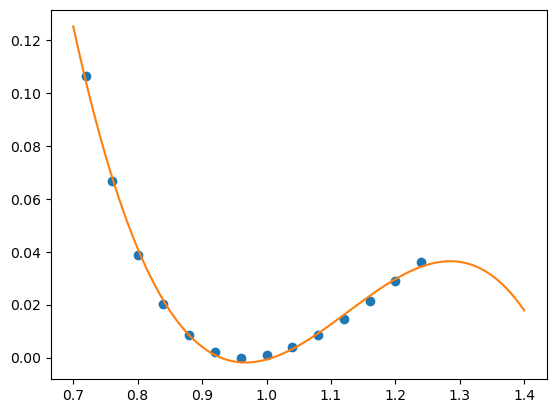

In [3]:
fig = plt.figure()
plt.plot(pot.rOH, pot.pot_energy, 'o', label='data')
rs = np.linspace(0.7,1.4,100)
pot_fits = pot.pot_fit['poly'](rs, *pot.pot_fit['popt'])
plt.plot(rs, pot_fits, label='fit')
plt.show()

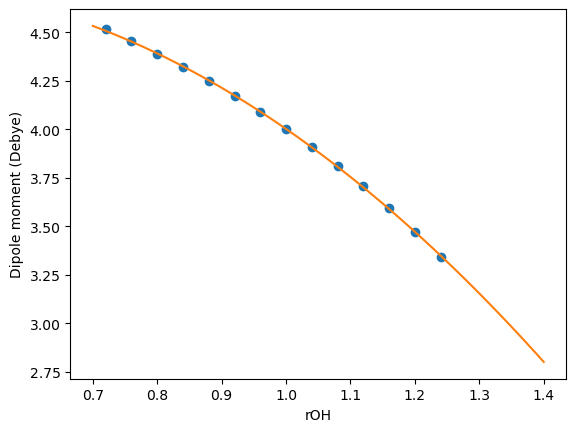

In [4]:
fig = plt.figure()
plt.plot(pot.rOH, pot.mu, 'o', label='data')
rs = np.linspace(0.7,1.4,100)
mu_fits = pot.mu_fit['mu_poly'](rs, *pot.mu_fit['popt'])
dmu_fits = pot.mu_fit['mu_deriv_poly'](rs, *pot.mu_fit['dmu_popt'])
plt.plot(rs, mu_fits, label='fit')
plt.xlabel('rOH')
plt.ylabel('Dipole moment (Debye)')
plt.show()

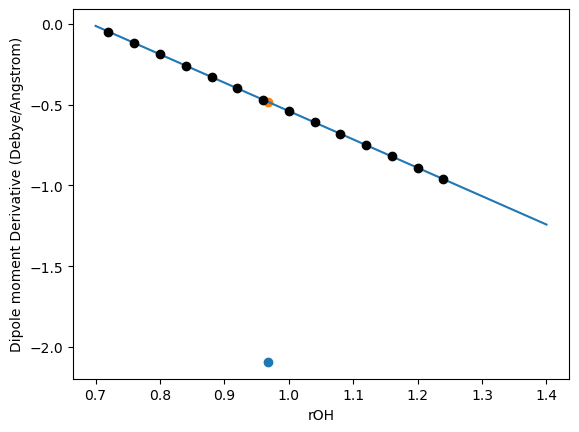

In [5]:
fig = plt.figure()
rs = np.linspace(0.7,1.4,100)
dmu_fits = pot.mu_fit['mu_deriv_poly'](rs, *pot.mu_fit['dmu_popt'])
plt.plot(rs, dmu_fits, label='fit')
plt.plot(pot.rOH, pot.mu_fit['mu_deriv_poly'](pot.rOH, *pot.mu_fit['dmu_popt']), 'o', label='numerical', c='black')
plt.scatter(pot.pot_fit['r0'], -pot.mu_fit['dmu_num'])
plt.scatter(pot.pot_fit['r0'], -pot.mu_fit['dmu/dr_r0'])
plt.xlabel('rOH')
plt.ylabel('Dipole moment Derivative (Debye/Angstrom)')
plt.show()

In [10]:
dvr = DVR(pot, emax=3.0, xmax=1.3, mass1=2.014, mass2=15.999)
dvr.do_calculation()
dvr.description()

DVR Class for 1D Potential
Reduced Mass: 3261.00284 au
Energy Cutoff:    0.11025 au
Maximum Position:    2.45664 au
Solved? True
w01:  3420.95123706881
w12:  1199.858049806986
mu01:  -0.10239937884554139
mu12:  0.2451408125384586
x01:  0.08789193344215089
x12:  -0.20147148596797496


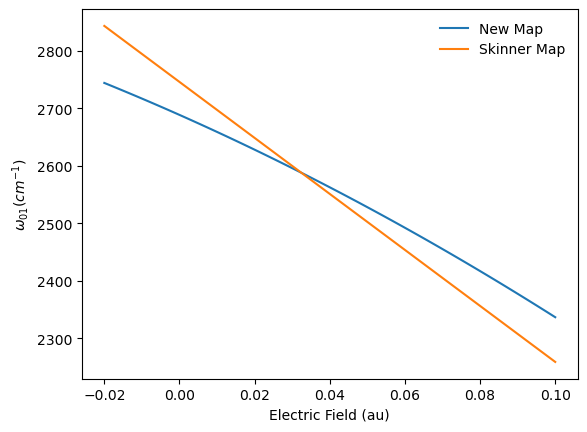

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def map(x, a, b, c):
    return a + b*x + c*x**2

efs = np.linspace(-0.02, 0.1, 100)

fig = plt.figure()
plt.plot(efs, map(efs, 2688.448, -2902.3037, -6166.8727), label="New Map")
plt.plot(efs, map(efs, 2745.8, -4870.3, 0), label="Skinner Map")
plt.xlabel("Electric Field (au)")
plt.ylabel("$\omega_{01} (cm^{-1})$")
plt.legend(frameon=False)
plt.show()

